## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Exploratory Data Analysis
2.	Multiple regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data (it is the same as for the previous assignment) and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and an html file of your work. 

Good luck!


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.anova as anova

%matplotlib inline

In [2]:
#Read in data
df2 =pd.read_csv('auto_imp.csv')

In [3]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## 1. Data 

### Get dummy variables for fuel_type

In [4]:
df2=pd.get_dummies(df2, columns=['fuel_type'],drop_first=True)


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    int64  
 10  peak_rpm       195 non-null    int64  
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(7), int64(7), uint8(1)
memory usage: 21.6 KB


In [6]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1


## 1.2 EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


# Provide descriptions of your sample and features

In [53]:
print("The Shape of the dataset:",df2.shape)
print("********************************************************************")
print(df2.info())
print("********************************************************************")
print(df2.describe())

The Shape of the dataset: (195, 15)
********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    int64  
 10  peak_rpm       195 non-null    int64  
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(7), int64(7), uint8(1)
mem

I used the .shape method to check the shape of the dataset.The Auto_Imports dataset has 195 rows(data points) and 15 coloumns(features).

I used the .info() method to get the information about the individual coloumns in the dataset.The dataset has 15 features(wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price and fuel_type_gas).All the features are of float and integer data type.All the features have a total of 195 data points and do not have any null values.

Finally I used the .describe() method to get all the statistical information like the mean,median,max value,min value,standard deviation and the quartiles of all the features in the dataset.

# Check for missing data 

In [8]:
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

I used the isnull() function to check for the null values and the sum() method to sum up all the null values present in a particular coloumn.After doing this i found that the given dataset does not have any missing values.

In [9]:
print("Duplicate Values =",df2.duplicated().sum())

Duplicate Values = 3


I used the .duplicated() function to check for the duplicate values and the sum() method to sum up all the duplicate values present.After doing this i found that the given dataset has only 3 duplicate values.

# Identify the shape of your data

## Univariate Analysis

### Distribution and Spread Of All Features

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


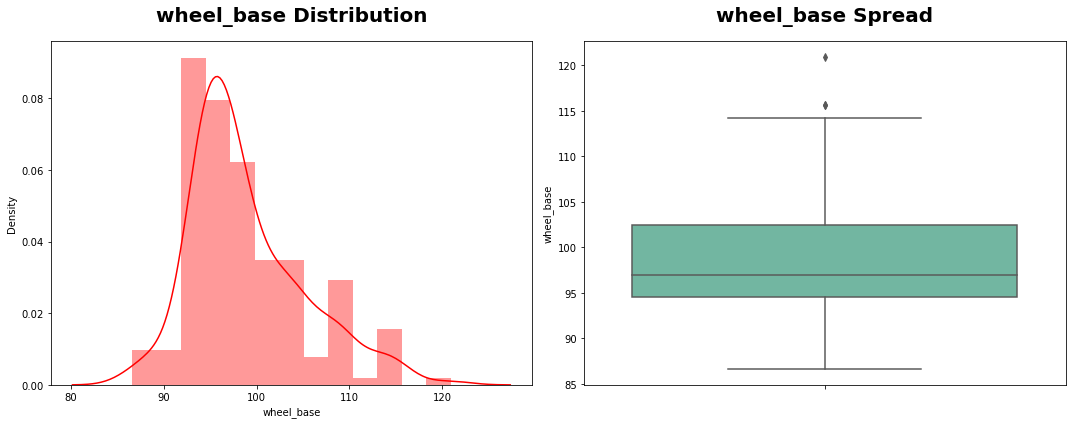

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["wheel_base"],color="red",kde=True)
plt.title("wheel_base Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["wheel_base"],palette="Set2")
plt.title("wheel_base Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


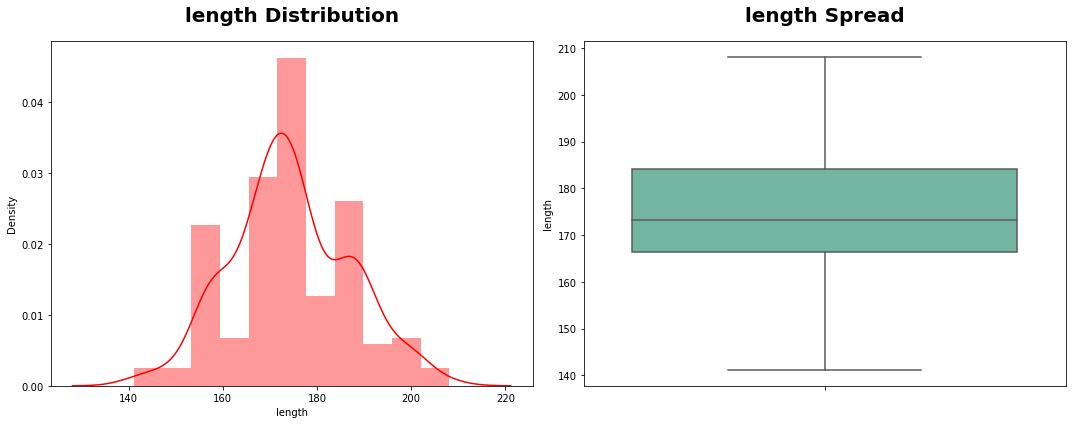

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["length"],color="red",kde=True)
plt.title("length Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["length"],palette="Set2")
plt.title("length Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


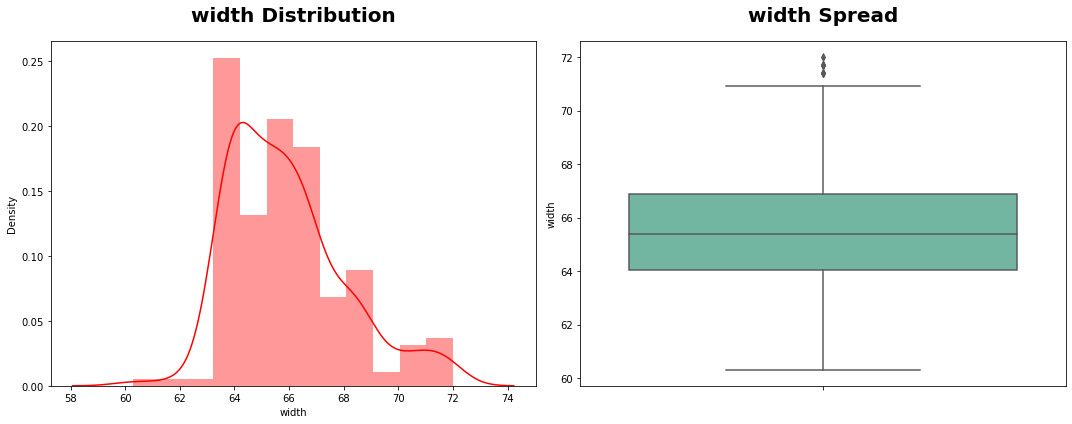

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["width"],color="red",kde=True)
plt.title("width Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["width"],palette="Set2")
plt.title("width Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


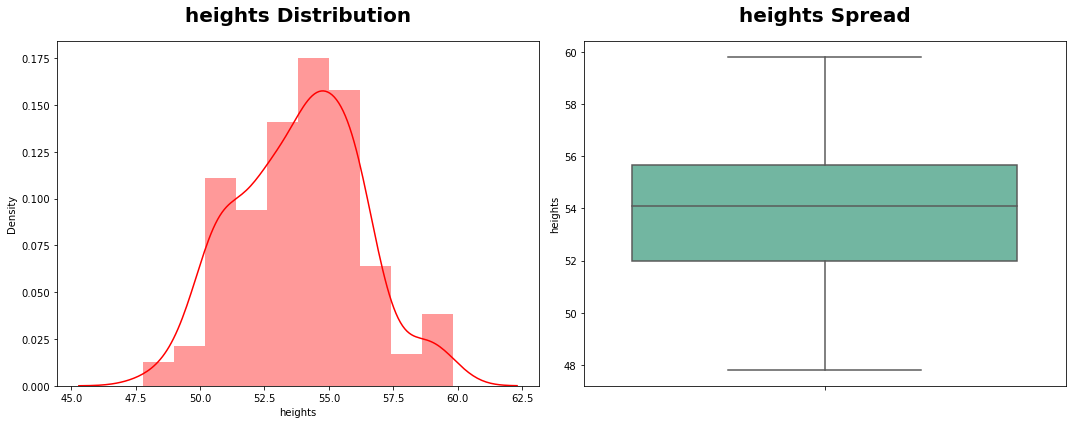

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["heights"],color="red",kde=True)
plt.title("heights Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["heights"],palette="Set2")
plt.title("heights Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


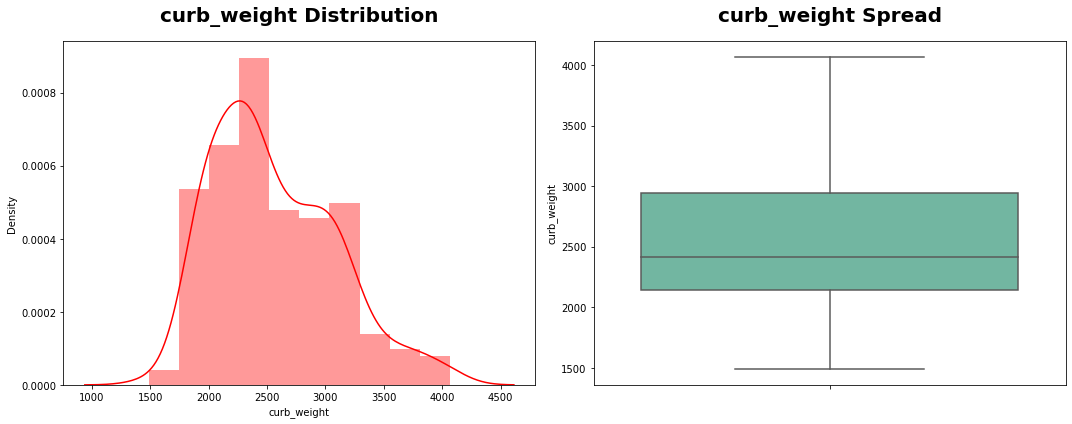

In [14]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["curb_weight"],color="red",kde=True)
plt.title("curb_weight Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["curb_weight"],palette="Set2")
plt.title("curb_weight Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


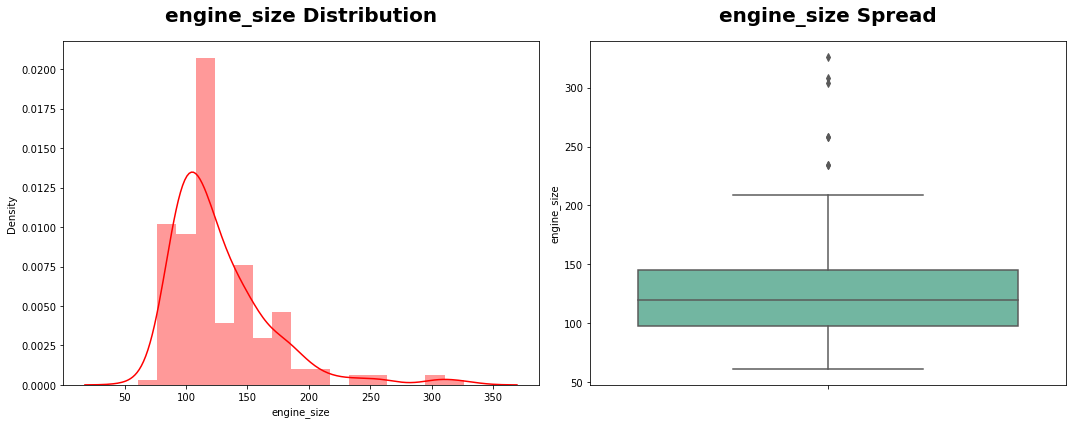

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["engine_size"],color="red",kde=True)
plt.title("engine_size Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["engine_size"],palette="Set2")
plt.title("engine_size Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


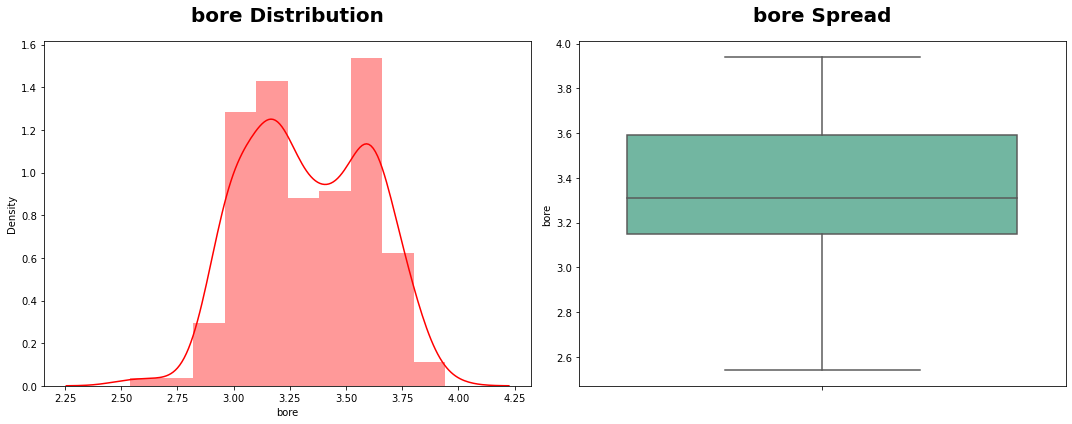

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["bore"],color="red",kde=True)
plt.title("bore Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["bore"],palette="Set2")
plt.title("bore Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


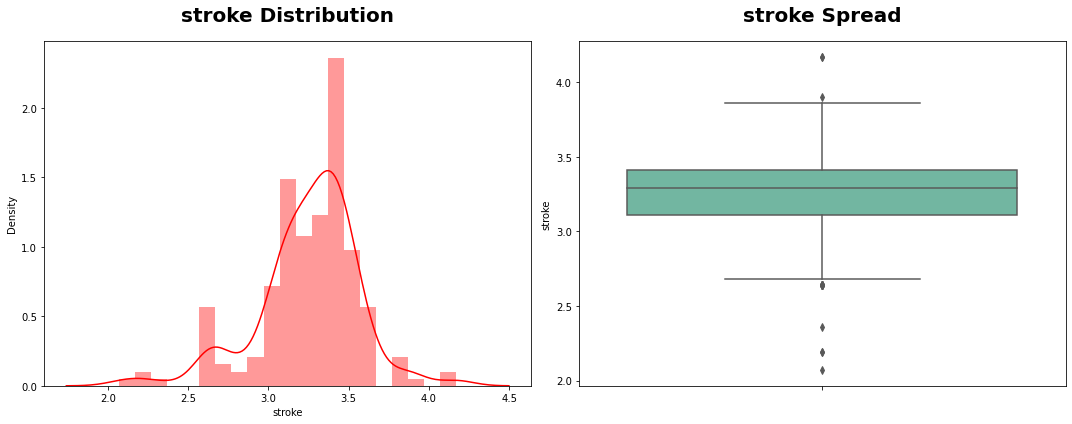

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["stroke"],color="red",kde=True)
plt.title("stroke Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["stroke"],palette="Set2")
plt.title("stroke Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


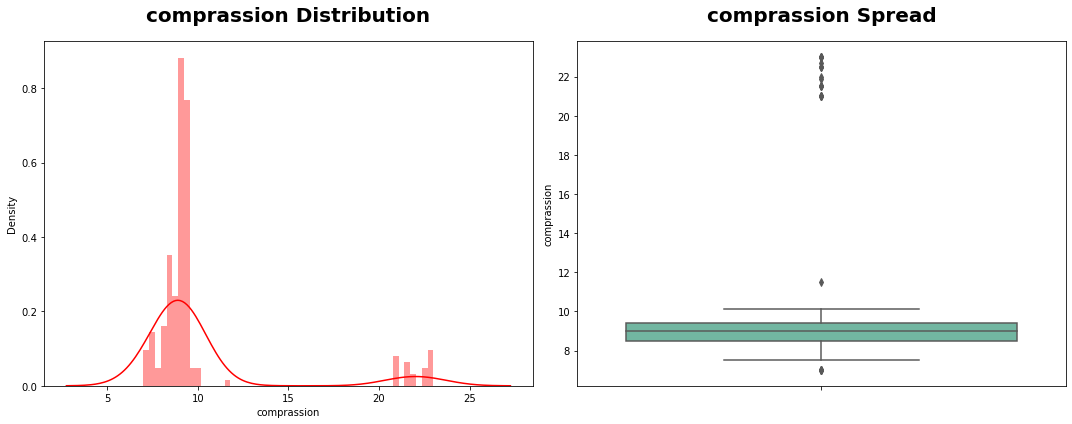

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["comprassion"],color="red",kde=True)
plt.title("comprassion Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["comprassion"],palette="Set2")
plt.title("comprassion Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


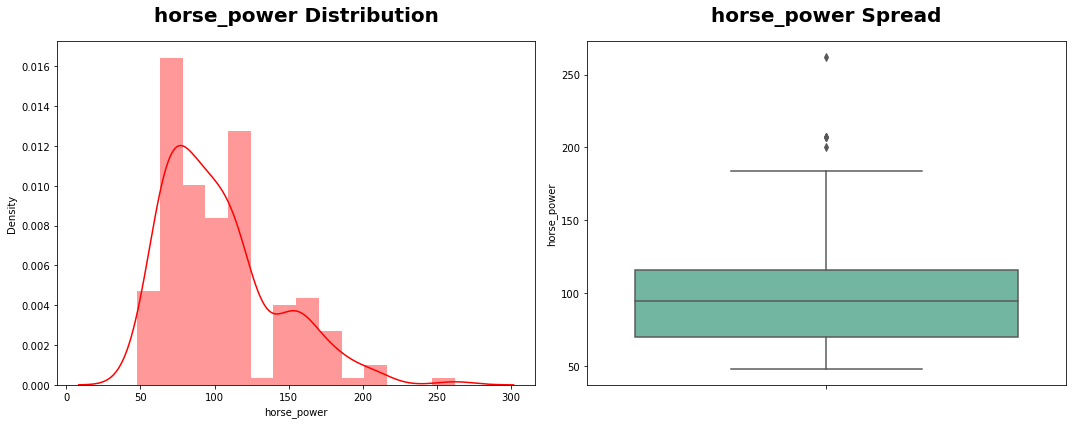

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["horse_power"],color="red",kde=True)
plt.title("horse_power Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["horse_power"],palette="Set2")
plt.title("horse_power Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


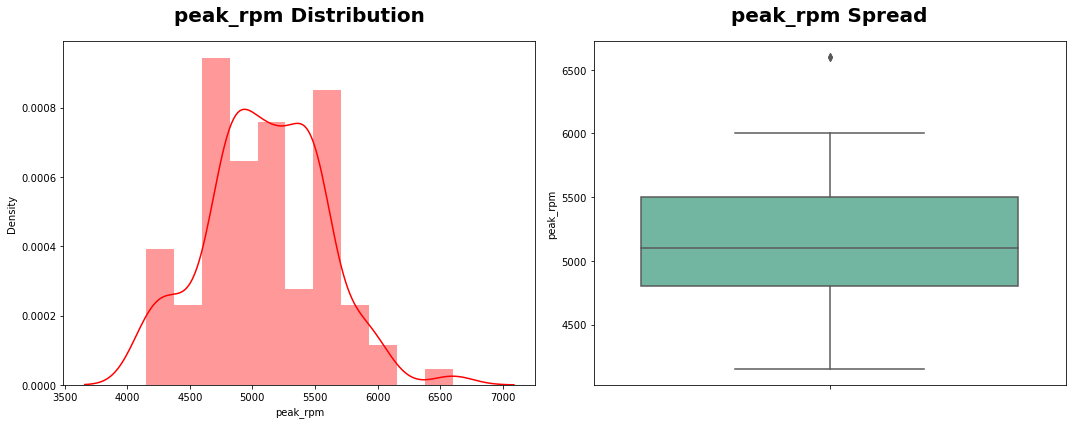

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["peak_rpm"],color="red",kde=True)
plt.title("peak_rpm Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["peak_rpm"],palette="Set2")
plt.title("peak_rpm Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


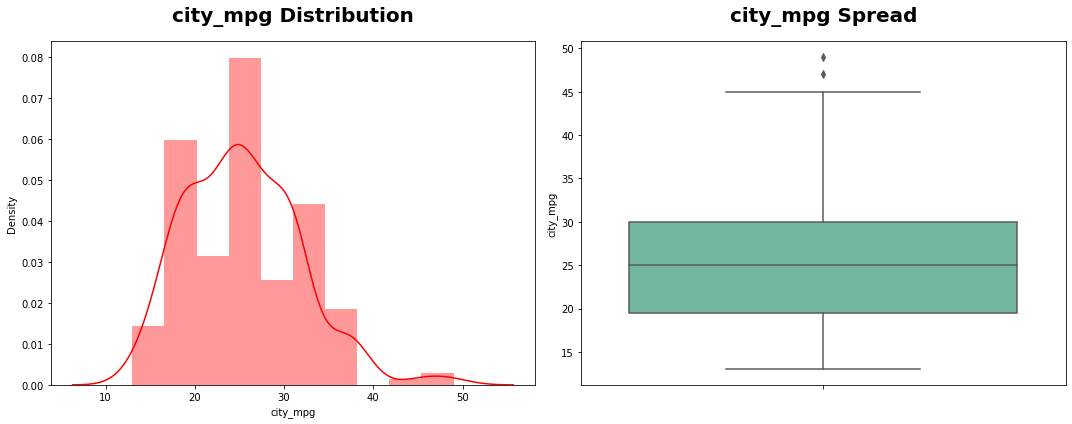

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["city_mpg"],color="red",kde=True)
plt.title("city_mpg Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["city_mpg"],palette="Set2")
plt.title("city_mpg Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


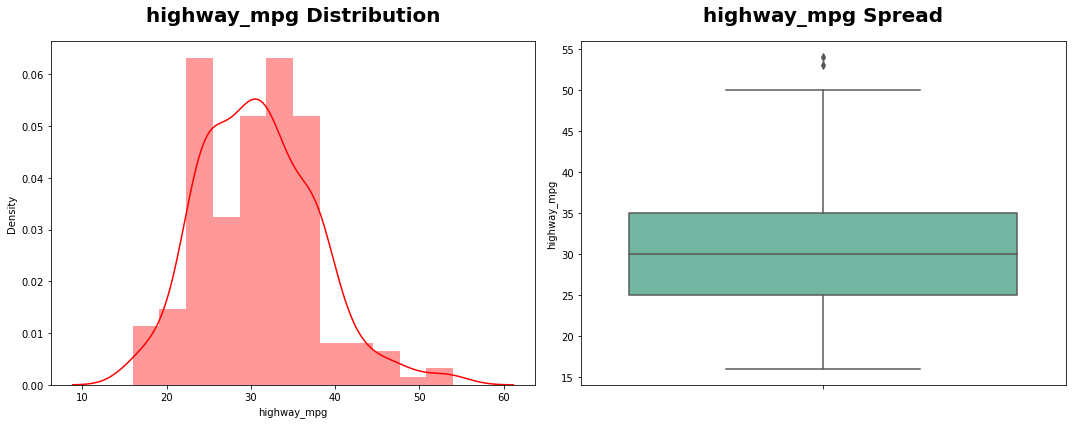

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["highway_mpg"],color="red",kde=True)
plt.title("highway_mpg Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["highway_mpg"],palette="Set2")
plt.title("highway_mpg Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [23]:
df2["fuel_type_gas"].value_counts()

1    175
0     20
Name: fuel_type_gas, dtype: int64

The Fuel Type feature has 175 data points of Fuel type Gas and 20 data points of Fuel type desiel.

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


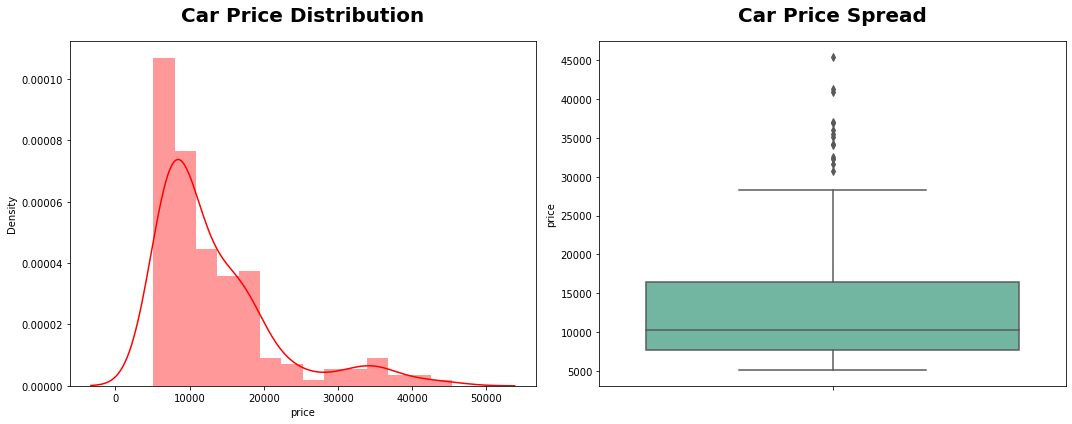

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df2["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df2["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

After ploting Dist plot and Box plot for all the features I found that the Price,highway_mpg,city_mpg,peak_rpm,horse_power, comprassion,stroke,engine_size,width and wheel_base features have Skewness and outliers.

### Bivariate  Analysis

In [25]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df2,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1


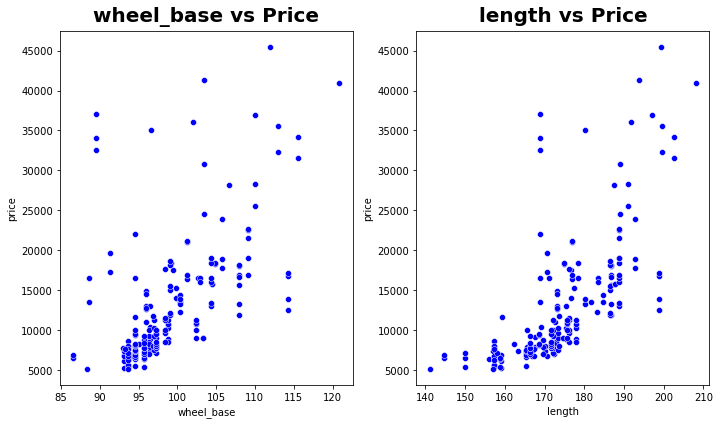

In [26]:
scatter_plot(["wheel_base","length"])

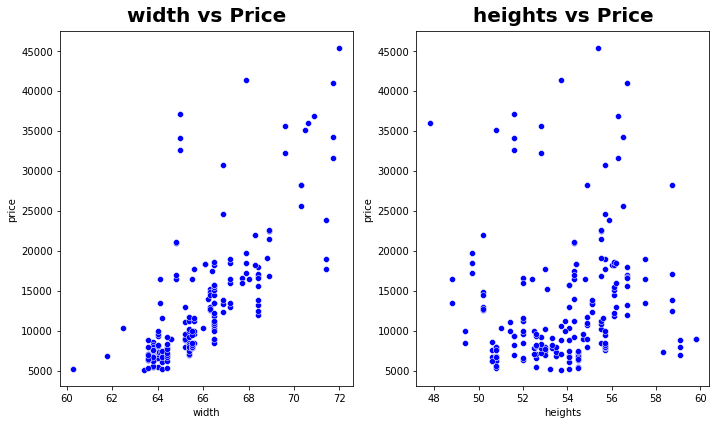

In [27]:
scatter_plot(["width","heights"])

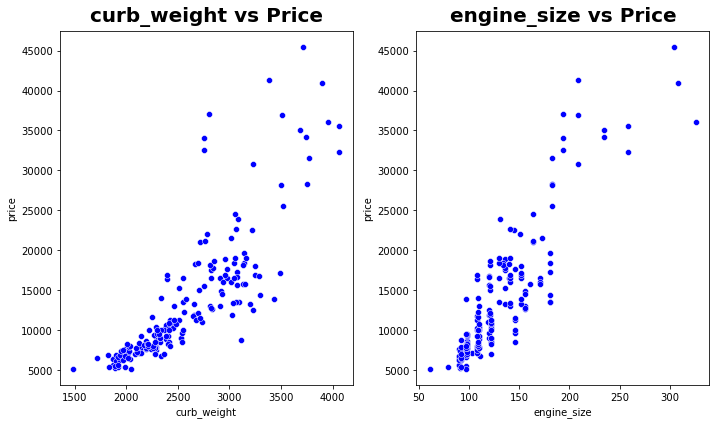

In [28]:
scatter_plot(["curb_weight","engine_size"])

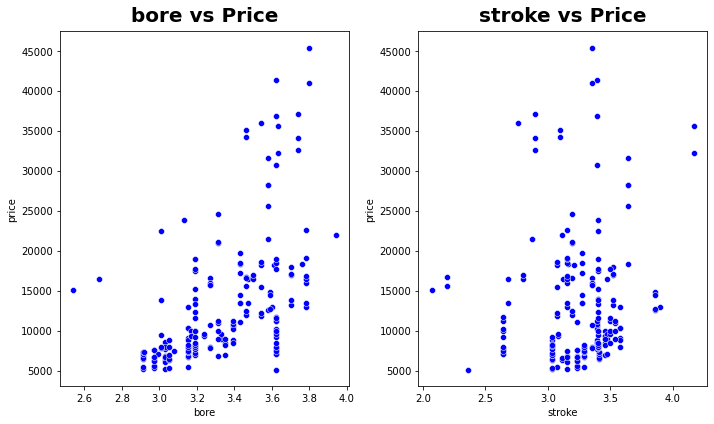

In [29]:
scatter_plot(["bore","stroke"])

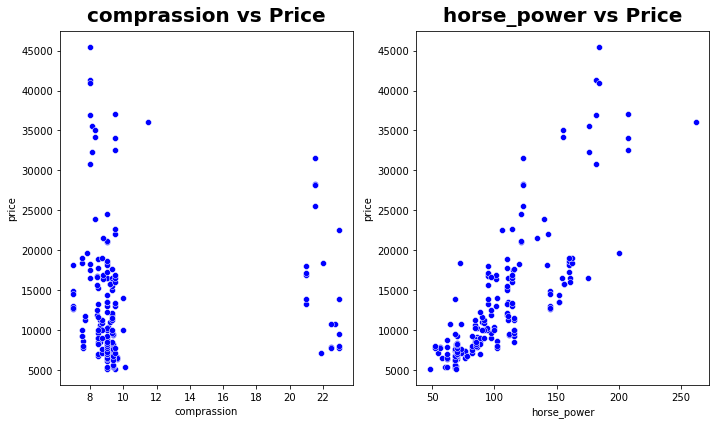

In [30]:
scatter_plot(["comprassion","horse_power"])

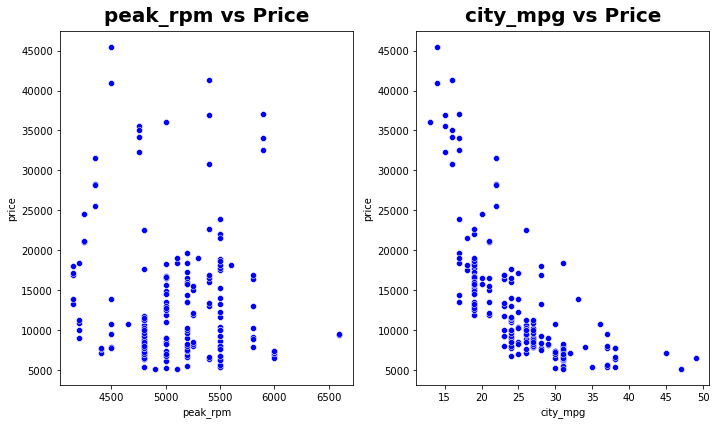

In [31]:
scatter_plot(["peak_rpm","city_mpg"])

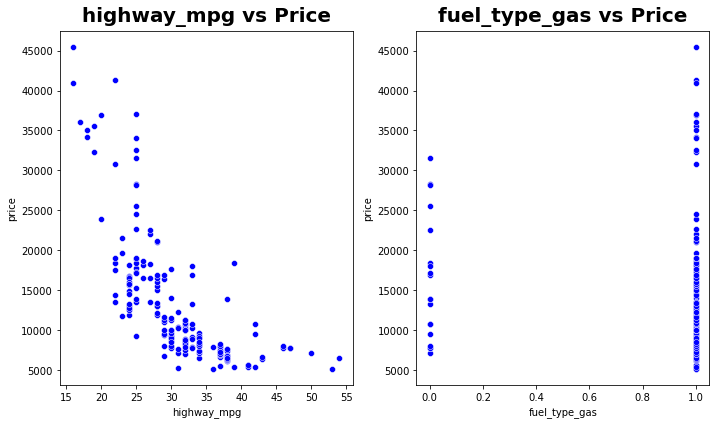

In [32]:
scatter_plot(["highway_mpg","fuel_type_gas"])

I plotted Scatter plot between all the independent features and the target feature Price.I found that the highway_mpg,city_mpg ,
horse_power,bore,engine_size,curb_weight,width and length features have a linear relationship to the Price feature.

In [33]:

corr=df2.corr(method="pearson")
print(corr)

               wheel_base    length     width   heights  curb_weight  \
wheel_base       1.000000  0.879222  0.819009  0.592500     0.782720   
length           0.879222  1.000000  0.858084  0.496218     0.881665   
width            0.819009  0.858084  1.000000  0.315834     0.867315   
heights          0.592500  0.496218  0.315834  1.000000     0.307732   
curb_weight      0.782720  0.881665  0.867315  0.307732     1.000000   
engine_size      0.569704  0.687479  0.740320  0.031286     0.857573   
bore             0.498228  0.609437  0.544311  0.189283     0.645806   
stroke           0.171722  0.118664  0.186432 -0.055525     0.172785   
comprassion      0.247730  0.160172  0.190997  0.261160     0.155382   
horse_power      0.375541  0.583813  0.616779 -0.084412     0.760285   
peak_rpm        -0.352331 -0.280986 -0.251627 -0.264078    -0.278944   
city_mpg        -0.499126 -0.689660 -0.647099 -0.102367    -0.772171   
highway_mpg     -0.566355 -0.719324 -0.692220 -0.151188    -0.81

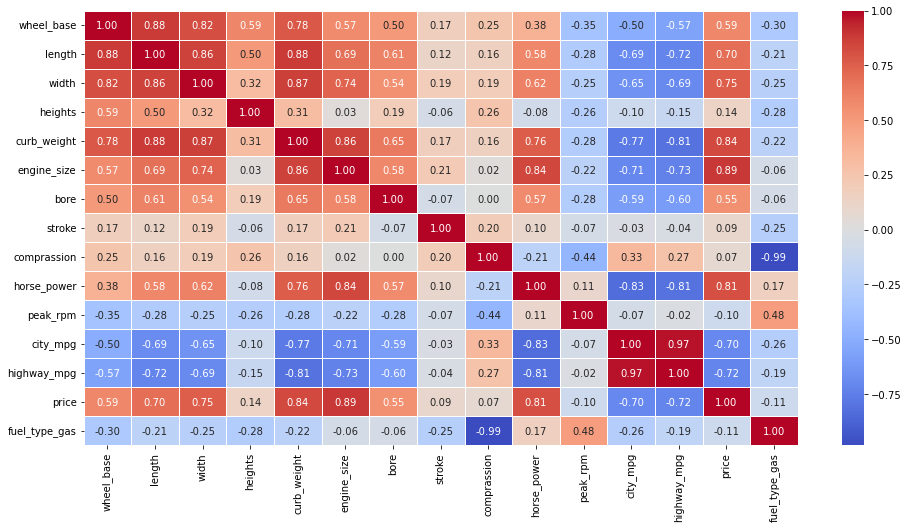

In [34]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(corr, annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1,cmap='coolwarm')
plt.show()

I used the Perason Correlation method to find the relations between all the features in the dataset and then used a heat map to plot the correlations.In the heat map the dark red colour indicates the highly significant positive correlations while the dark blue colour indicates the highly significant negative correlations.

For example, the correlation coefficient between "wheel_base" and "length" is 0.879, which is a positive correlation. This indicates that these two features are positively related; as the wheel_base of a car increases, the length of the car also tends to increase. Similarly, the correlation coefficient between "curb_weight" and "city_mpg" is -0.772, which is a negative correlation. This indicates that these two features are negatively related; as the curb_weight of a car increases, the city_mpg tends to decrease.

The features with the highest positive correlation in the dataset are:

1)Length and wheel base (0.879222)

2)Width and curb weight (0.867315)


The features with the highest negative correlation in the dataset are:

1)Highway mpg and city mpg (-0.971383)

2)Fuel type and compression ratio (-0.985398)

## 2. Multiple Regression Analysis

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [35]:
new_df = df2

In [36]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_) 
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [39]:
model_prediction(LinearRegression(fit_intercept=True))

Model slope:     56.08406764583522
Model intercept: -47908.12367483397
r2_Score of LinearRegression() model on Training Data is: 84.60945506324009
r2_Score of LinearRegression() model on Testing Data is: 85.59279144115465


In [40]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           5.84e-69
Time:                        22:13:57   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.45e+04   1.84e+04     -2.419

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Answer the questions based on the output

1. How do you interpret the intercept?


2. How many variables are statistically significant?


3. What is the variance of the model?


4. What is the coefficeint of determination and how do you interpret it?


5. What is the F-statistics used for? How do you interpret it for this model?


1)The intercept of the model is -47908.123674835, which means that when all the independent variables in the model are zero, the expected value of the price of Desiel Car is $ 47908.123674835.

2)Based on the p-values in the model summary, the statistically significant variables in the model are width, heights, engine_size, stroke, peak_rpm,horse_power and fuel_type_gas.These variables have p-values less than 0.10.

3)The R-squared value for the model on the training data is 84.609 percent , which means that the model explains 84.609 percent of the variation in the dependent variable (price) based on the independent variables.

4)The coefficient of determination is the R-squared value.It is calculated as the proportion of the total variation in the dependent variable (price) that is explained by the independent variables in the model. In this case, the R-squared value for the model on the training data is 84.609%, which means that 84.609% of the variation in price can be explained by the independent variables in the model.

5) F-statistic is used to test the overall significance of the model.In this case, the F-statistic is 78.89 and the associated p-value is 5.84e-69, which means that the model is statistically significant overall.

**2. Dropp all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [41]:
new_df1 = df2[["heights","peak_rpm","fuel_type_gas","horse_power","stroke","engine_size","width","price"]]

In [42]:
x = new_df1.drop(columns=["price"])
y = new_df1["price"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_) 
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [45]:
model_prediction(LinearRegression(fit_intercept=True))

Model slope:     239.4198685824171
Model intercept: -53947.78992771781
r2_Score of LinearRegression() model on Training Data is: 83.973066671788
r2_Score of LinearRegression() model on Testing Data is: 85.91638814122544


In [46]:
X = sm.add_constant(x)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     156.5
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.17e-74
Time:                        22:13:57   Log-Likelihood:                -1842.3
No. Observations:                 195   AIC:                             3701.
Df Residuals:                     187   BIC:                             3727.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.609e+04   1.14e+04     -4.907

/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Answer the questions based on the output


1. How do you interpret the intercept? 


2. How many variables are statistically significant? 


3. What is the variance of the model? 


4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 


5. What is the F-statistics used for? How do you interpret it for this model?


1)The intercept is -53947.78992771759, which means that if all independent variables are equal to zero, the predicted price of a Desiel car would be $ 53947.78992771759.

2)The variables heights, peak_rpm, fuel_type_gas, horse_power, stroke, engine_size, and width, are statistically significant because their p-values are less than the significance level of 0.10.

3)The R-squared value for the model on the training data is 83.973 percent , which means that the model explains 83.973 percent of the variation in the dependent variable (price) based on the independent variables.

4)The coefficient of determination is the R-squared value.It is calculated as the proportion of the total variation in the dependent variable (price) that is explained by the independent variables in the model. In this case, the R-squared value for the model on the training data is 83.973%, which means that 83.973% of the variation in price can be explained by the independent variables in the model.

5)The F-statistic is used to test the overall significance of the regression model. In this case, the F-statistic is 156.5, with a corresponding p-value of 1.17e-74. The p-value is less than the significance level of 0.05, indicating that the model is statistically significant.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [47]:
anova_table = anova.anova_lm(model1, model)
print(anova_table)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0     187.0  1.835838e+09      0.0           NaN       NaN       NaN
1     180.0  1.764456e+09      7.0  7.138198e+07  1.040285  0.404632


Null Hypothesis (H0): The reduced model is better than the full model.

Alternative Hypothesis (Ha): The full model is better than the reduced model.

From the anova table the p-value for the F-test is 0.404632, which is greater than the typical significance level of 0.05. Therefore, we cannot reject the null hypothesis and conclude that the reduced model is a better fit for the data than the full model.

## 3. Checking the assumptions on the model you chose based on ANOVA:

-What are the assumptions?


-Do they hold? How do you test/check?



The assumptions are:

1)Normality: The residuals should be normally distributed.

2)Constant Variance: The residuals should have constant variance across all levels of the independent variables.

3)Linearity: There should be a linear relationship between the independent and dependent variables.



To check if these assumptions hold:

1)Normality: We can plot a histogram or a Q-Q plot of the residuals. If the residuals follow a normal distribution, then the assumption is satisfied.

2)Constant Variance: We can plot the residuals against the predicted values. If the variance of the residuals is constant across all levels of the independent variables, then the assumption is satisfied.

3)Linearity: We can create a scatter plot of the actual values against the predicted values. If the plot shows a linear relationship, the assumption is satisfied.







### Check for normality

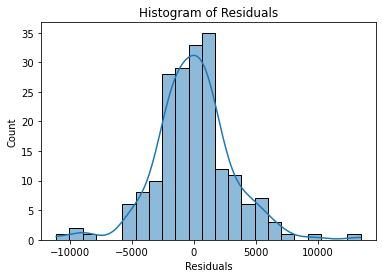

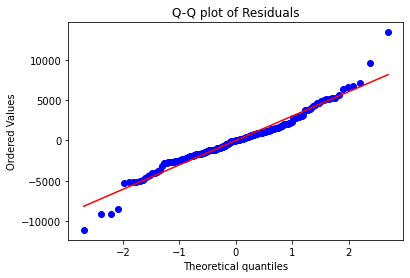

In [48]:

residuals = model1.resid
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


stats.probplot(residuals, plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

Through the Histogram and Q-Q plot we can see that the residuals are normally distributed it shows that the normality assumption  holds for the model.

### Check for constant variance

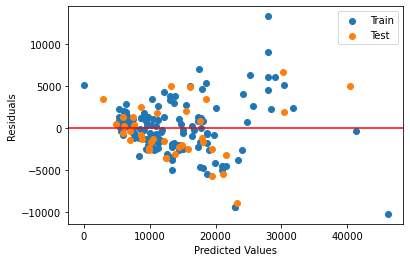

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuals_train, label='Train')
plt.scatter(y_pred_test, residuals_test, label='Test')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Here in the scatter plot we can see that there is a funnel pattern near the zero line So we can say that the assumption of constant variance is not satisfied.

### Plots to check linearity assumption:

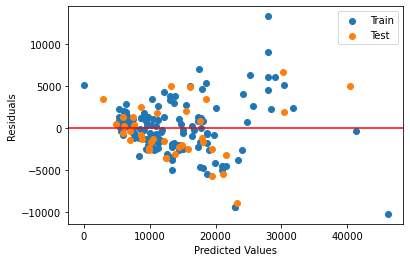

In [50]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuals_train, label='Train')
plt.scatter(y_pred_test, residuals_test, label='Test')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


As we can see no clear pattern in this plot, this indicates that the relationship between the dependent variable and the independent variables is linear.The linearity assumption is satisfied.

## 4. Is there Multicollinearity in your data?

Calculate VIF for both the full model and the reduce model. What do you notice?

In [51]:

full_model = sm.OLS(df2['price'], sm.add_constant(df2[["length","highway_mpg","fuel_type_gas","city_mpg","wheel_base","comprassion","peak_rpm","horse_power","curb_weight","heights","bore","stroke","engine_size","width"]])).fit()


full_vif = [variance_inflation_factor(full_model.model.exog, i) for i in range(full_model.model.exog.shape[1])]
print('Full model VIF:', full_vif)


reduced_model = sm.OLS(df2['price'], sm.add_constant(df2[["heights","peak_rpm","fuel_type_gas","horse_power","stroke","engine_size","width","price"]])).fit()


reduced_vif = [variance_inflation_factor(reduced_model.model.exog, i) for i in range(reduced_model.model.exog.shape[1])]
print('Reduced model VIF:', reduced_vif)

Full model VIF: [6734.074793403907, 10.542914289504559, 24.68692655156972, 65.96686479052237, 26.507360213052948, 7.97936692934524, 65.09032532030056, 2.1814766494406252, 9.246098720909863, 16.451930151873587, 2.25855674581733, 2.1298982689916315, 1.4933858620112281, 8.819457868537159, 5.831011966603378]
Reduced model VIF: [2930.1332876846886, 1.3953089835961074, 1.8870415923943717, 1.7066263520096852, 5.632506037863625, 1.2559424308274711, 9.49808952249257, 3.0701191389770517, 6.858700250144746]


/Users/abhaybhaskarmallampalli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Based on the VIF values, there appears to be high multicollinearity in the full model, as several variables have VIF values greater than 10. This suggests that some of these variables may be highly correlated with each other, which can lead to unstable estimates and inflated standard errors.

In the reduced model, the VIF values are lower,the reduced model appears to have less multicollinearity compared to the full model.


